# K Nearest Neighbors - Projeto 

In [1]:
# Importando as bibliotecas 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

## Obtendo os dados

In [2]:
df = pd.read_csv('KNN_Project_Data')

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# Análise exploratória de dados


** Criando um pairplot com a tonalidade indicada pela coluna TARGET CLASS. **

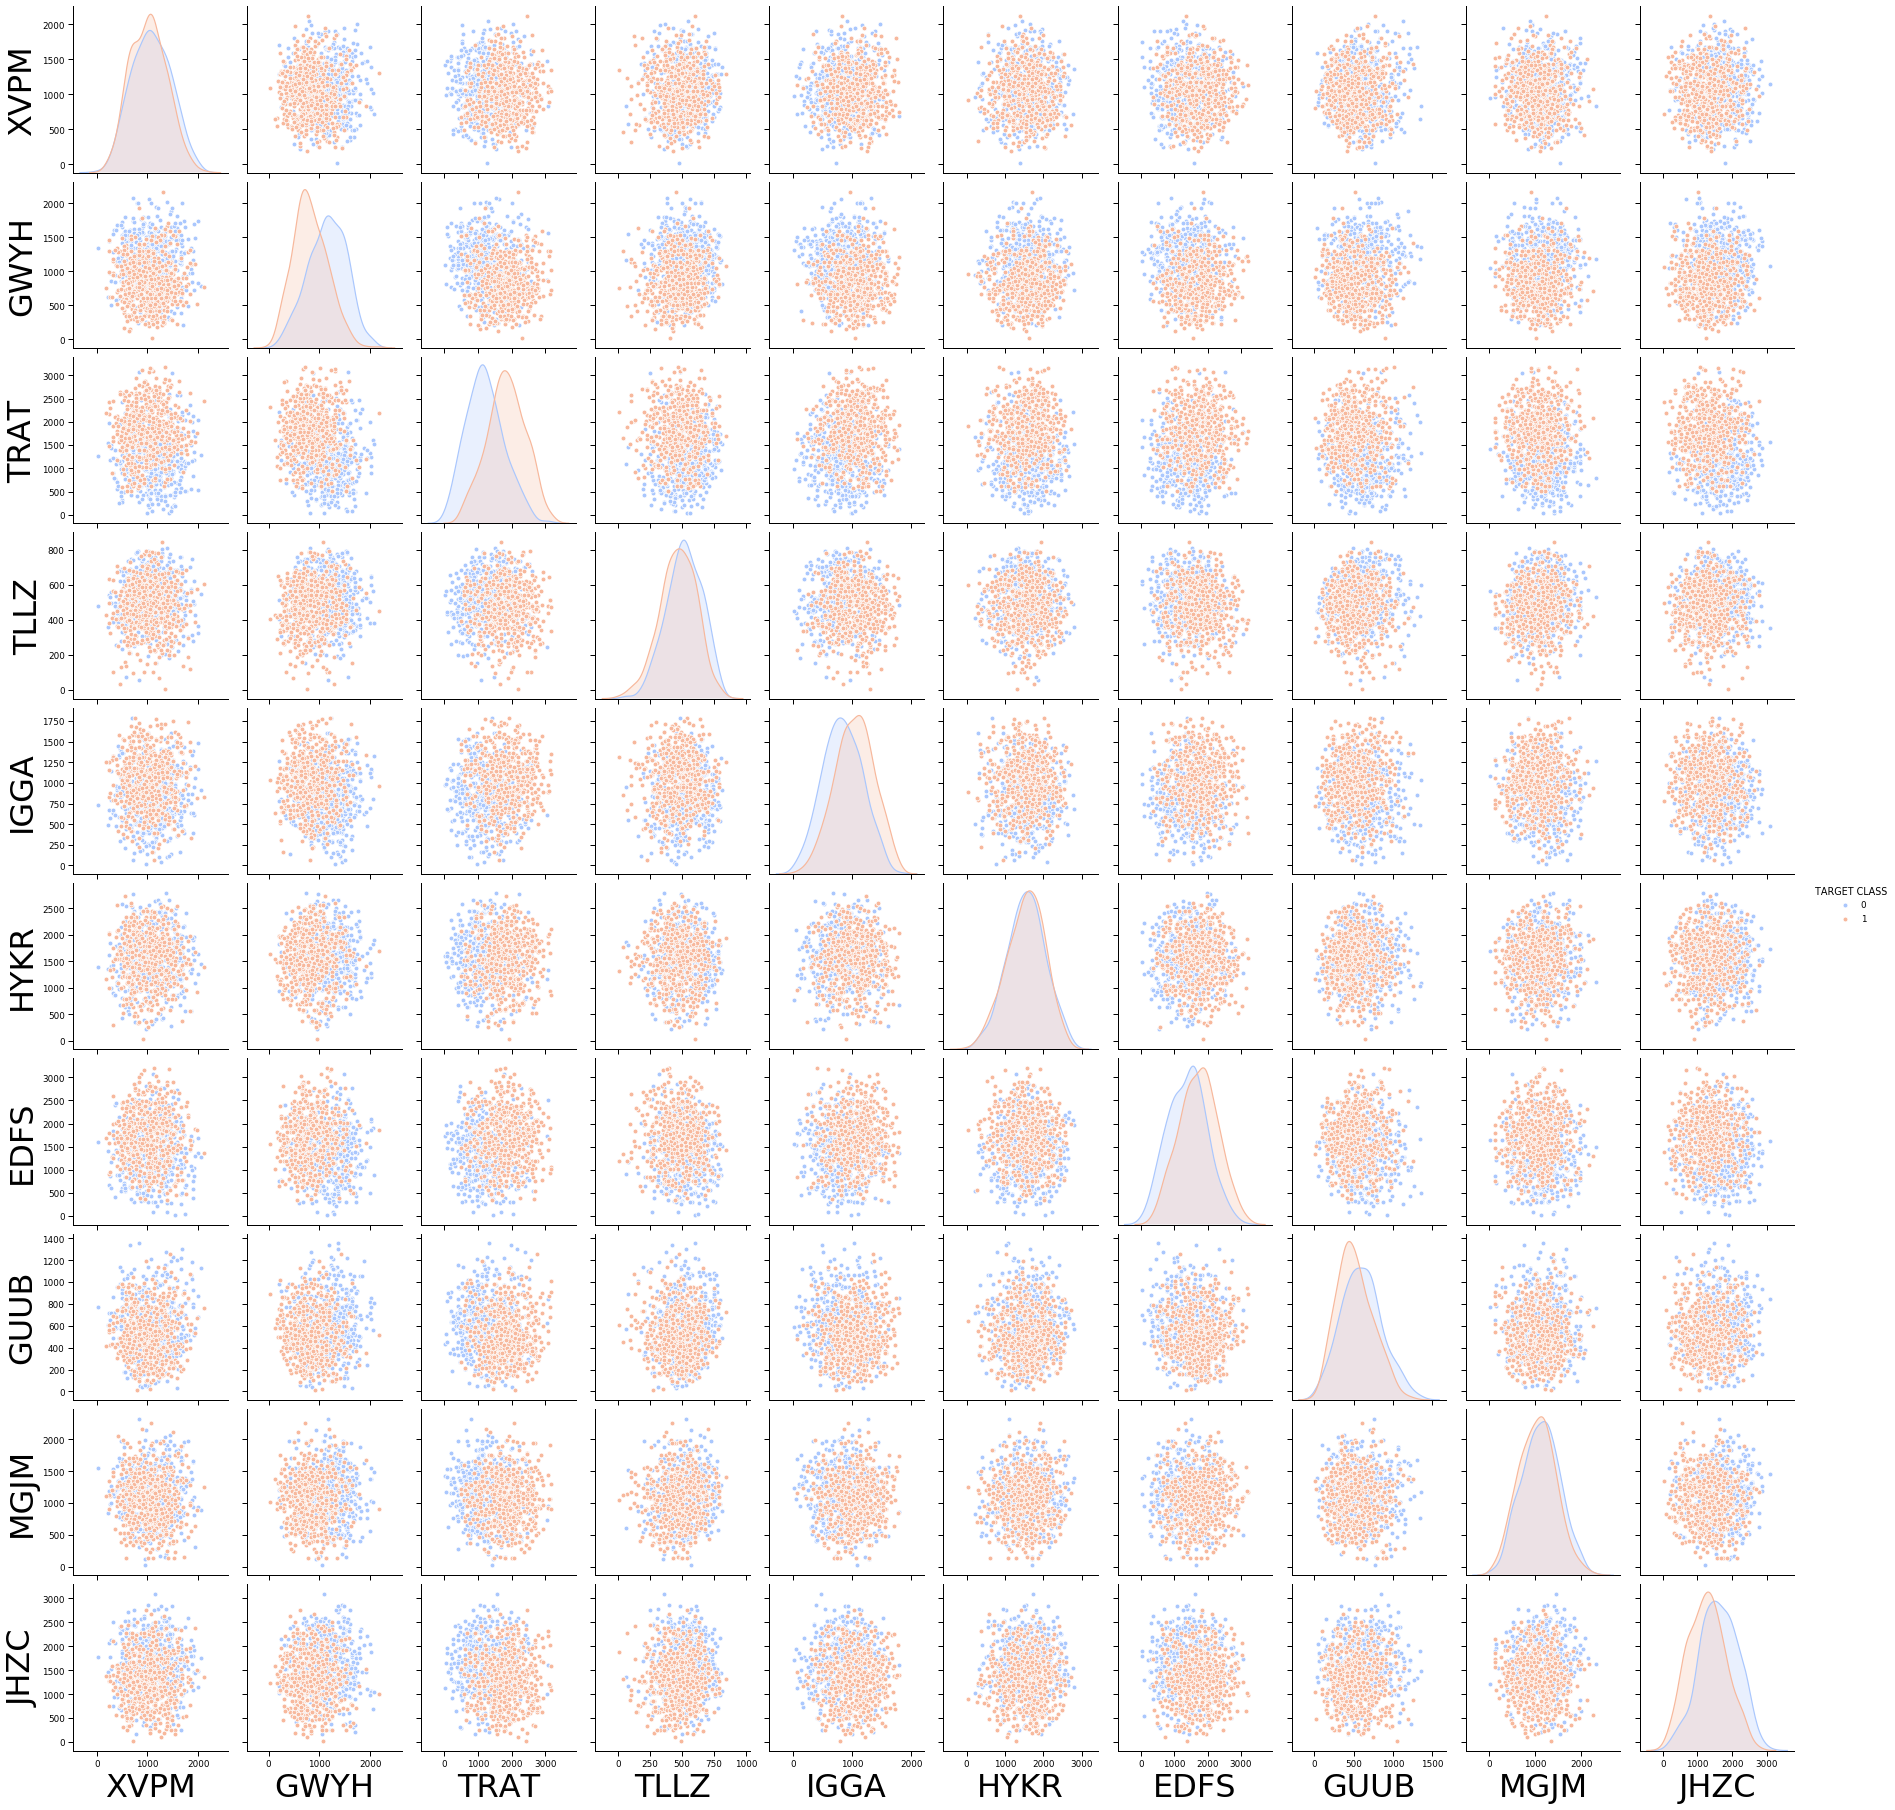

In [4]:
sns.set_context("paper", rc={"axes.labelsize":32})
sns.pairplot(df, hue = "TARGET CLASS", palette='coolwarm', height=2.5)

# Padronizando as variáveis

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop('TARGET CLASS', axis=1));

In [8]:
df_transf =  scaler.transform(df.drop('TARGET CLASS', axis=1))

** Salvando os dados transformados em um novo Data Frame, menos os labels **

In [9]:
df_transf = pd.DataFrame(df_transf, columns = df.columns[:-1])

In [10]:
df_transf.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


Etapas: 
- Primeiro dividirei os dados em treino-teste.
- Tentarei encontrar o melhor valor de 'n_neighbors' para o modelo de KNN afim de obter o melhor f1_score
- Em seguida treinarei um modelo, com o melhor 'n_neighbors' encontrado para este conjunto de treino-teste.
- Repetirei o processo realizando um Grid Search, para encontrar o melhor valor de 'n_neighbors' e comparar os resultados dos dois processos.


# Divisão treino-teste

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_transf, df['TARGET CLASS'],
                                                    test_size=0.30, random_state = 42)
X = df_transf
y = df['TARGET CLASS']

# Usando o KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier();

## Treinando o modelo

In [15]:
from sklearn.metrics import f1_score
scores_f1 = []
kas = []

## Experimentando 40 valores diferentes para 'k' (1 - 40) e salvando o f1_score resultante 
## em 'scores_f1'

for i in range(1,41): 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    kas.append((f1_score(pred_i, y_test), 'k ==' + str(i)))
    scores_f1.append((f1_score(pred_i, y_test)))

#### Visualizando a relação entre 'k' e f1_score no conjunto de teste.

Text(0, 0.5, 'f1_score')

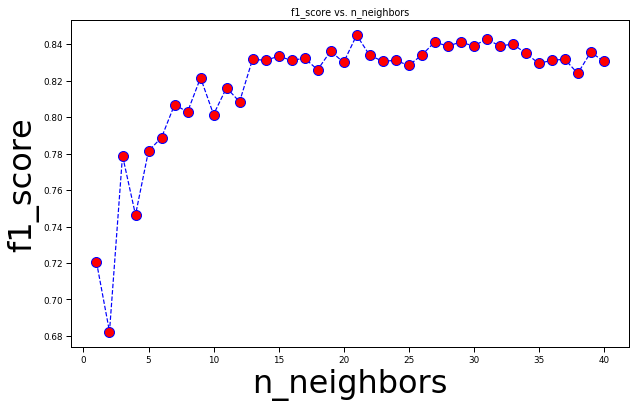

In [16]:
plt.figure(figsize=(10,6))
plt.plot(range(1,41),scores_f1,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('f1_score vs. n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('f1_score')

#### Mais explicitamente, os valores de k ordenados por seu f1_score resultante no modelo. Podemos ver que o valor de k que obtém o maior f1_score é 21

In [17]:
sorted(kas)

[(0.6823529411764706, 'k ==2'),
 (0.7205387205387205, 'k ==1'),
 (0.7463768115942029, 'k ==4'),
 (0.7788778877887789, 'k ==3'),
 (0.7814569536423841, 'k ==5'),
 (0.7887323943661972, 'k ==6'),
 (0.8013937282229966, 'k ==10'),
 (0.8028169014084509, 'k ==8'),
 (0.8067796610169492, 'k ==7'),
 (0.8083623693379791, 'k ==12'),
 (0.8160535117056856, 'k ==11'),
 (0.8215488215488216, 'k ==9'),
 (0.8239202657807309, 'k ==38'),
 (0.825938566552901, 'k ==18'),
 (0.8282828282828283, 'k ==25'),
 (0.8294314381270904, 'k ==35'),
 (0.8299319727891157, 'k ==20'),
 (0.8305647840531561, 'k ==23'),
 (0.8305647840531561, 'k ==40'),
 (0.8310810810810811, 'k ==14'),
 (0.8310810810810811, 'k ==16'),
 (0.8310810810810811, 'k ==24'),
 (0.8310810810810811, 'k ==36'),
 (0.8316831683168316, 'k ==13'),
 (0.8316831683168316, 'k ==37'),
 (0.8322147651006712, 'k ==17'),
 (0.8333333333333333, 'k ==15'),
 (0.8338983050847457, 'k ==22'),
 (0.8338983050847457, 'k ==26'),
 (0.835016835016835, 'k ==34'),
 (0.8355263157894737,

## Criando um modelo com n_neighbors = 21

In [18]:
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

#### Imprimindo um classificantion report para os resultados da previsão. 

In [19]:
print(classification_report(y_test, preds, digits = 4))

              precision    recall  f1-score   support

           0     0.8278    0.8562    0.8418       146
           1     0.8591    0.8312    0.8449       154

    accuracy                         0.8433       300
   macro avg     0.8434    0.8437    0.8433       300
weighted avg     0.8439    0.8433    0.8434       300



## Criando um modelo com Grid Search

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
## criando uma lista com valores entre 1-40
neigh = []
for i in range(1,41):
    neigh.append(i)

## Os parametros que vão para o Grid Search
parameters = {'n_neighbors': neigh}

In [22]:
## O modelo testará 40 valores de n_neighbors com cross validation de 20 k-folds

clf = GridSearchCV(knn, parameters, scoring = 'f1', cv = 20)
clf.fit(X_train, y_train);

#### Diferentemente do caso anterior, o melhor valor para n_neighbors encontrado é de 16.

In [23]:
clf.best_params_

{'n_neighbors': 16}

#### Usando o modelo para prever e imprimindo o classification report

In [24]:
preds = clf.predict(X_test)

print(classification_report(y_test, preds, digits = 4))

              precision    recall  f1-score   support

           0     0.8038    0.8699    0.8355       146
           1     0.8662    0.7987    0.8311       154

    accuracy                         0.8333       300
   macro avg     0.8350    0.8343    0.8333       300
weighted avg     0.8358    0.8333    0.8332       300



### Considerações

** Questionamento **

O f1_score obtido com train_test_split é ligeiramente superior ao obtido com o GridSearch. Sendo GridSearch um algorítimo que almeja encontrar os melhores hiperparametros para o modelo, porque train_test_split performa melhor?
    

** Explicação **

Neste exemplo, o GridSearch executa um cross validation com 20 k-folds. O score que obtemos é do estimador que melhor performou em média dentre todos os folds quando avaliando os dados de teste, e ele pode não ser o estimador com melhor score no caso de train_test_split. É possível que um diferente estimador tenha um score maior, porém como oferecemos splits diferentes e calculamos o score em cada um dos conjuntos de testes utilizados, no final obtemos o melhor estimador <b>em média</b>. 

A idéia é que com o cross validation possamos escolher um estimador que é mais resiliente às mudanças nos dados, não necessariamente representados em um simples train_test_split. Portanto, quanto mais splits fizermos, melhor o modelo performará com dados novos. 

No caso apresentado aqui, 'melhor' não sifnifica que produza um f1_score 'maior', e sim que dada a variação nos dados presentes no modelo com GridSearch, o modelo fará um trabalho melhor englobando essas variações, e em média produzirá resultados melhores conforme novos dados sejam incluidos no seu treinamento.